#Patricia L Walker WGU Data Analytics Capstone#

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [64]:
#store data
cancer_df = pd.concat([y, X], axis=1)
cancer_df.head()
cancer_df.to_csv('cancer.csv', index=False)

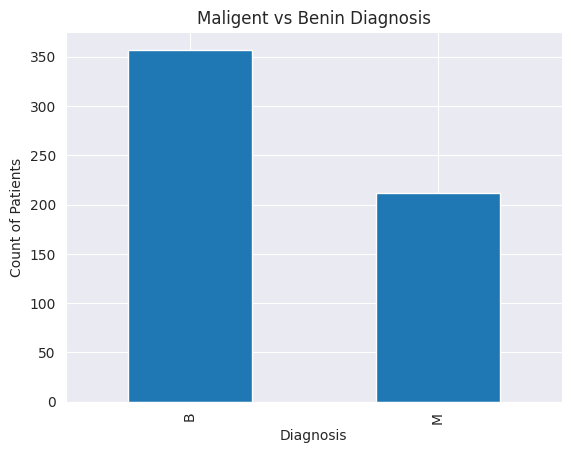

In [65]:
# bar chart of diagnosis
cancer_df['Diagnosis'].value_counts().plot(kind='bar');
plt.title('Maligent vs Benin Diagnosis');
plt.ylabel('Count of Patients');
plt.show();


In [66]:
#compare the average by diagnosis to see if the dataset contains significant differences
average_by_diagnosis = cancer_df.groupby('Diagnosis').mean()
avg_df = pd.DataFrame(average_by_diagnosis)
avg_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
Diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


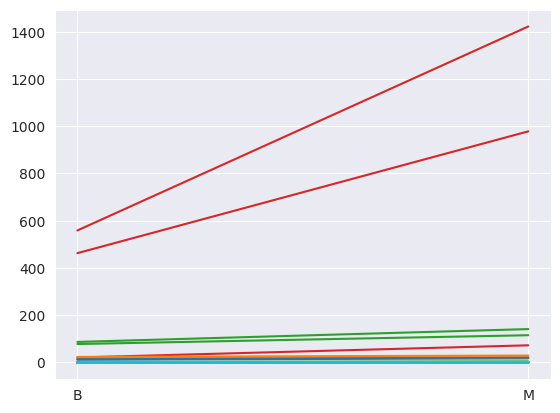

In [67]:
plt.plot(avg_df)

In [68]:
# Data cleaning

cancer_df['Diagnosis'] = cancer_df.Diagnosis.map({'B':0, 'M':1})

cancer_label = cancer_df['Diagnosis']
cancer_df.pop('Diagnosis')

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

In [69]:
#apply feature scaling to the dataset
from sklearn import preprocessing as p
scaler = p.StandardScaler()
scaler.fit(cancer_df)
cancer_ss = scaler.transform(cancer_df) # Fit and transform the data

cancer_ss = pd.DataFrame(cancer_ss, columns=cancer_df.columns, index=cancer_df.index) #create a dataframe

In [70]:
# Import train_test_split
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(cancer_ss,
                                                    cancer_label,
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 455 samples.
Testing set has 114 samples.


In [71]:
# Function to compare various classifiers
from sklearn.metrics import fbeta_score, accuracy_score
from time import time
import matplotlib.patches as mpatches


def train_predict(learner, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    #Fit the learner to the training data 
    learner = learner.fit(X_train, y_train)
    
       
    #Get the predictions on the test set(X_test)
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
          
    #Compute accuracy on training set
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    #Compute accuracy on test set 
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #Compute F-score on the the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
       
    # Return the results
    return results

In [72]:
def plot_graphs(results):

  
    # Create figure
    fig, ax = plt.subplots(2, 2, figsize = (16,16))

    # Constants
    bar_width = 0.25
    colors = ['#A00000','#00A0A0','#00A000', '#0000AA']
    
        # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        #for j, metric in enumerate(['acc_train', 'f_train', 'acc_test', 'f_test']):
                        
        #plot code
        ax[0, 0].bar(k*bar_width, results[learner]['acc_train'], width = bar_width, color = colors[k])
        ax[0, 1].bar(k*bar_width, results[learner]['f_train'], width = bar_width, color = colors[k])
        ax[1, 0].bar(k*bar_width, results[learner]['acc_test'], width = bar_width, color = colors[k])
        ax[1, 1].bar(k*bar_width, results[learner]['f_test'], width = bar_width, color = colors[k])


    # Add unique y-labels
    ax[0, 0].set_ylabel("Accuracy Score")
    ax[0, 1].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Accuracy Score")
    ax[1, 1].set_ylabel("F-score")


    ax[0, 0].tick_params(labelbottom=False)
    ax[0, 1].tick_params(labelbottom=False)
    ax[1, 0].tick_params(labelbottom=False)
    ax[1, 1].tick_params(labelbottom=False)
    
    # Add titles
    ax[0, 0].set_title("Accuracy Score on Training Subset", size='large')
    ax[0, 1].set_title("F-score on Training Subset", size='large')
    ax[1, 0].set_title("Accuracy Score on Testing Set", size='large')
    ax[1, 1].set_title("F-score on Testing Set", size='large')
    
   
    # Set y-limits for score panels
    ax[0, 0].set_ylim((0.75, 1))
    ax[0, 1].set_ylim((0.75, 1))
    ax[1, 0].set_ylim((0.75, 1))
    ax[1, 1].set_ylim((0.75, 1))


    
    # Aesthetics
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.45), \
               loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'large')
    fig.subplots_adjust(hspace=0.25) 
    plt.suptitle("Performance Metrics for Supervised Learning Models", fontsize = 16)
    plt.show()

In [73]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC


#Initialize the models
clf_A = RandomForestClassifier(random_state=21)
clf_B = AdaBoostClassifier(random_state=21)
clf_C = SVC(kernel='linear', random_state=21)
clf_D = GradientBoostingClassifier()

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = \
    train_predict(clf, X_train, y_train, X_test, y_test)



In [74]:
print(results)


{'RandomForestClassifier': {'acc_train': 1.0, 'acc_test': 0.9736842105263158, 'f_train': 1.0, 'f_test': 0.974025974025974}, 'AdaBoostClassifier': {'acc_train': 1.0, 'acc_test': 0.9736842105263158, 'f_train': 1.0, 'f_test': 0.974025974025974}, 'SVC': {'acc_train': 0.989010989010989, 'acc_test': 0.9736842105263158, 'f_train': 0.990159901599016, 'f_test': 0.974025974025974}, 'GradientBoostingClassifier': {'acc_train': 1.0, 'acc_test': 0.9736842105263158, 'f_train': 1.0, 'f_test': 0.9623430962343096}}


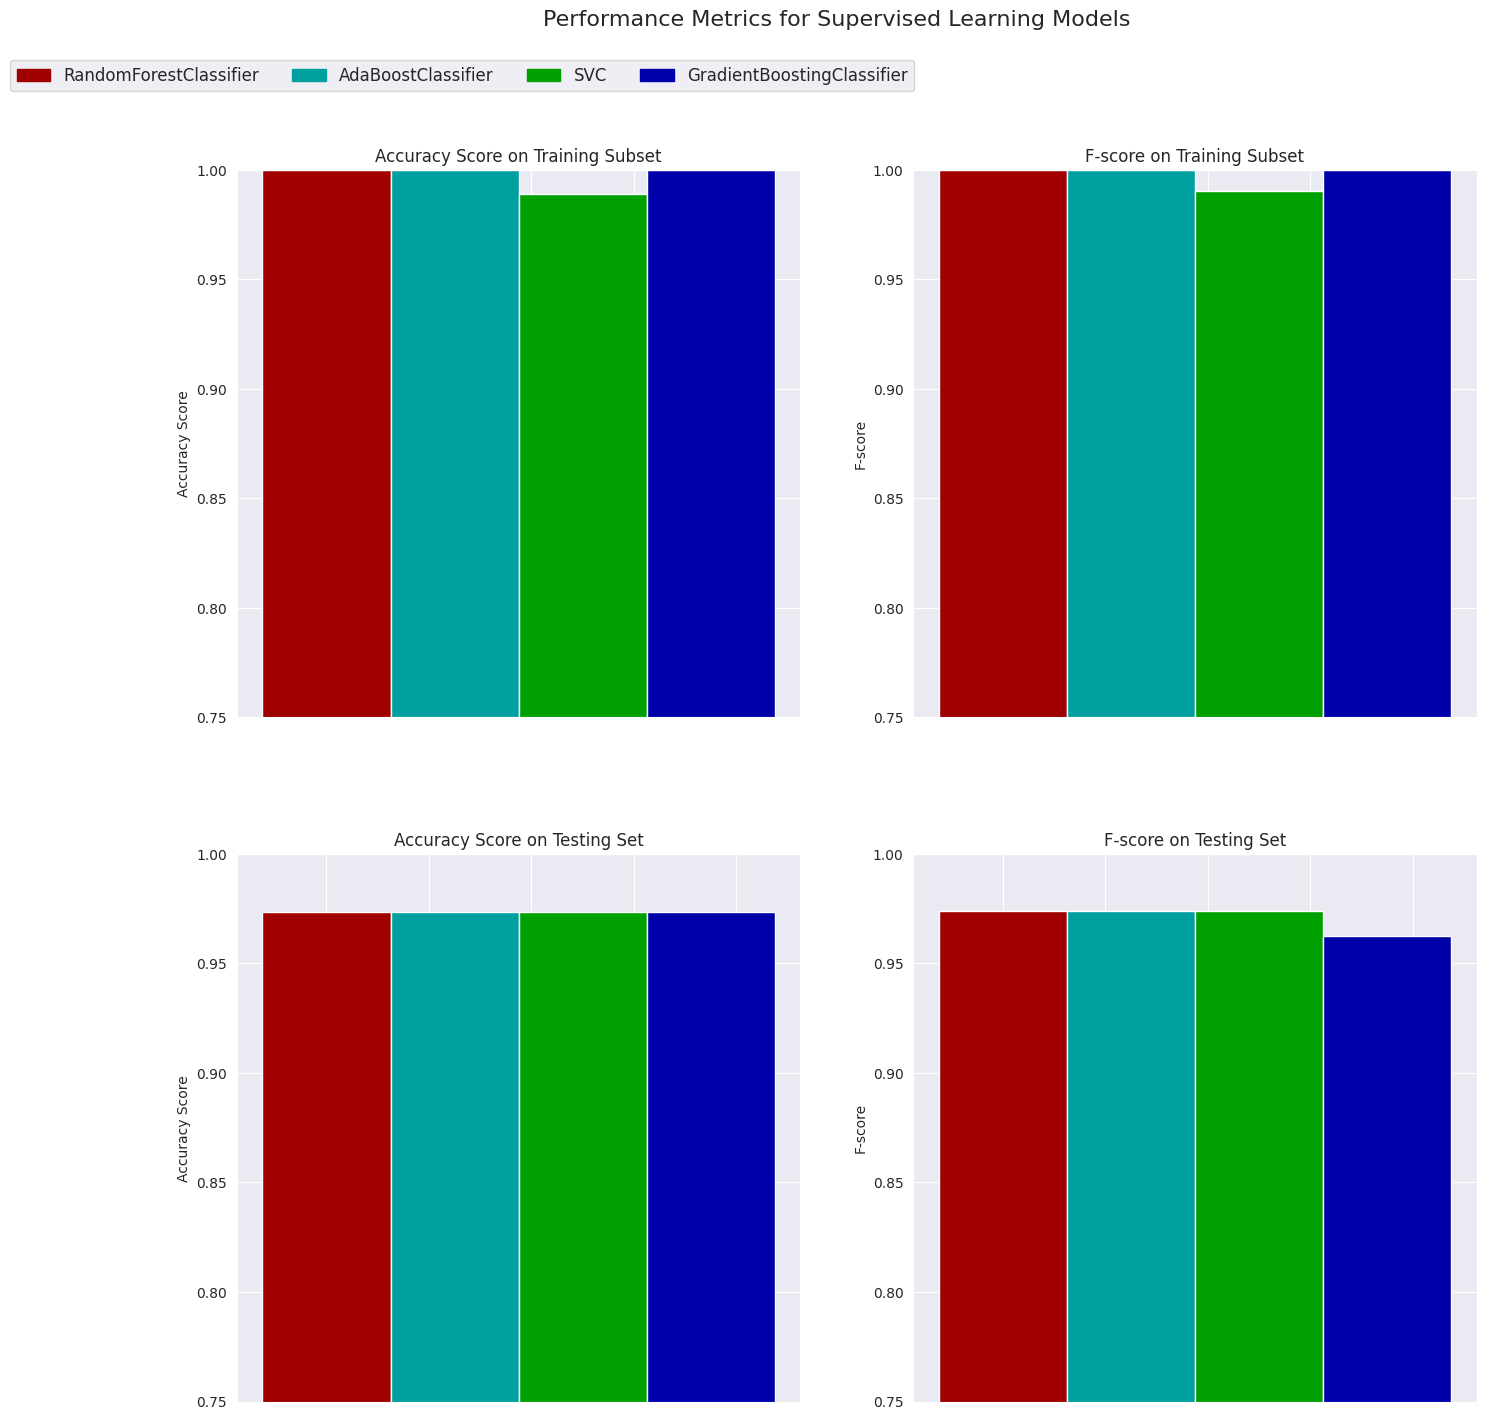

In [75]:
plot_graphs(results)

In [76]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer

# Parameters to tune the model
#parameters = {'kernel':['linear','rbf','poly','sigmoid'],'C':[0.1, 1.0, 10, 25, 35, 50, 100],'gamma':[0.0001, 0.001, 0.01, 0.1, 0.5, 1],'class_weight':['balanced', {0: 1.0, 1: 5.0}],'degree':[1,3,5,10], 'coef0':[0.0, 0.1, 0.5, 1.0]}
#parameters = {'n_estimators':[1, 25, 50, 100, 125, 150, 200, 300, 500, 1000], 'learning_rate':[0.01, 0.1, 0.5,1.0,10.0,15.0], 'estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=5)], 'random_state':[21]}
parameters ={'n_estimators':[100, 125, 150, 200, 300], 'max_depth':[None, 5, 10, 15, 20, 50], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 5, 10], 'max_features': [1, 5, 10, 15, 'sqrt', 'log2'], }

def calculate_F1_Score(parameters,clf, X_train, y_train, X_test, y_test):
    #Make an fbeta_score scoring object.
    scorer = make_scorer(f1_score)

    # Perform grid search on the classifier using 'scorer' as the scoring method.
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

    #Fit the grid search object to the training data and find the optimal parameters.
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator.
    best_clf = grid_fit.best_estimator_

    # Fit the new model.
    best_clf.fit(X_train, y_train)

    # Make predictions using the new model.
    best_train_predictions = best_clf.predict(X_train)
    best_test_predictions = best_clf.predict(X_test)

    # Calculate the f1_score of the new model.
    print('The training F1 Score is', f1_score(best_train_predictions, y_train))
    print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
    print('The testing Accuracy Score is', accuracy_score(best_test_predictions, y_test))

    
    # Let's also explore what parameters ended up being used in the new model.
    print(best_clf)


In [77]:
# Parameters to tune the model
parameters = {'kernel':['linear','rbf','poly','sigmoid'],'C':[0.1, 1.0, 10, 25, 35, 50, 100],'gamma':[0.0001, 0.001, 0.01, 0.1, 0.5, 1],'class_weight':['balanced', {0: 1.0, 1: 5.0}],'degree':[1,3,5,10], 'coef0':[0.0, 0.1, 0.5, 1.0]}
calculate_F1_Score(parameters,clf_C, X_train, y_train, X_test, y_test)

The training F1 Score is 0.9847094801223242
The testing F1 Score is 0.968421052631579
The testing Accuracy Score is 0.9736842105263158
SVC(C=35, class_weight='balanced', coef0=1.0, degree=5, gamma=0.001,
    kernel='poly', random_state=21)


In [78]:
# Parameters to tune the model
parameters = {'n_estimators':[1, 25, 50, 100, 125, 150, 200, 300, 500, 1000], 'learning_rate':[0.01, 0.1, 0.5,1.0,10.0,15.0], 'estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=5)], 'random_state':[21]}
calculate_F1_Score(parameters,clf_B, X_train, y_train, X_test, y_test)

The training F1 Score is 1.0
The testing F1 Score is 0.968421052631579
The testing Accuracy Score is 0.9736842105263158
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=300, random_state=21)


In [79]:
# Parameters to tune the model
parameters ={'n_estimators':[100, 125, 150, 200, 300], 'max_depth':[None, 5, 10, 15, 20, 50], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 5, 10], 'max_features': [1, 5, 10, 15, 'sqrt', 'log2'], }
calculate_F1_Score(parameters,clf_A, X_train, y_train, X_test, y_test)

The training F1 Score is 1.0
The testing F1 Score is 0.9787234042553191
The testing Accuracy Score is 0.9824561403508771
RandomForestClassifier(max_depth=10, max_features=5, n_estimators=300,
                       random_state=21)


In [80]:
final_model = RandomForestClassifier(max_depth=10, max_features=5, n_estimators=300,
                       random_state=21)

In [81]:
final_results = {}
final_results['base_model_results'] = train_predict(clf_A, X_train, y_train, X_test, y_test)
final_results['final_model_results'] = train_predict(final_model, X_train, y_train, X_test, y_test)


In [82]:
print(final_results)

{'base_model_results': {'acc_train': 1.0, 'acc_test': 0.9736842105263158, 'f_train': 1.0, 'f_test': 0.974025974025974}, 'final_model_results': {'acc_train': 1.0, 'acc_test': 0.9824561403508771, 'f_train': 1.0, 'f_test': 0.9787234042553191}}


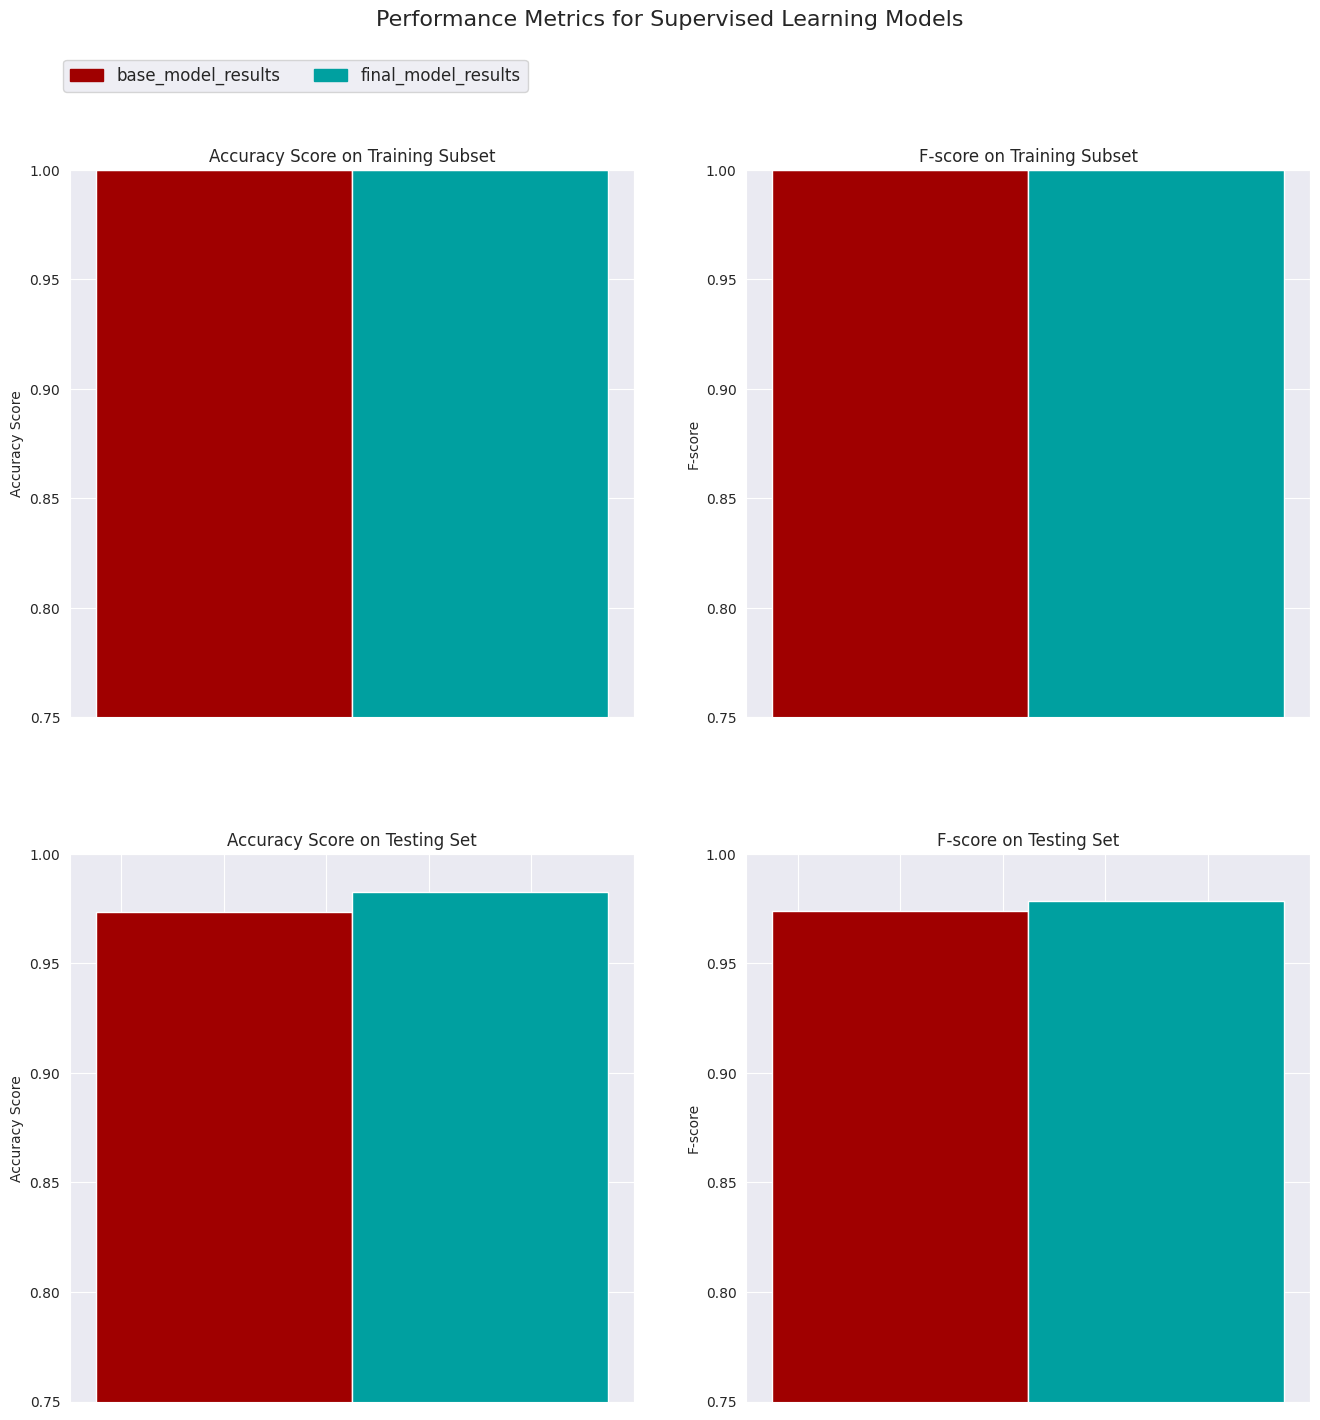

In [83]:
plot_graphs(final_results)